# 요약, Summarization
- [강좌링크](https://wikidocs.net/166831)

가장 어려운 NLP 작업 중 하나

[aihub 도서자료 요약 데이터셋](https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=93) 사용
- datas/KoT5
    - 도서자료 요약
        - Training
            - [원천]도서요약_train.zip
                - 기술과학
                    - *.json
                - 기타
                    - *.json
                - 사회과학
                    - *.json
                - 예술
                    - *.json
        - Validation
            - [원천]도서요약_valid.zip
                - 기술과학
                    - *.json
                - 기타
                    - *.json
                - 사회과학
                    - *.json
                - 예술
                    - *.json



# Preprocess

모든 json 파일 읽어서 한 csv 파일로 저장

###### columns
passage > review_body
summary > review_title

In [1]:
from tqdm.auto import tqdm
import json, os
import pandas as pd

base_dir = "../../datas/KoT5/도서자료 요약"
training_dir = f"{base_dir}/Training/[원천]도서요약_train"
valid_dir = f"{base_dir}/Validation/[원천]도서요약_valid"
sub_dirs = ["기술과학", "기타", "사회과학", "예술"]

def make_dataset(root_dir: str, output_file_name: str) -> None:
    column_names = ["review_title", "review_body"]
    row_data = []
    
    for sub_dir in sub_dirs:
        json_dir = f"{root_dir}/{sub_dir}"
        print(f">>> {json_dir} ...")
        
        json_files = [json_file for json_file in os.listdir(json_dir) if json_file.endswith(".json")]
        progress_bar = tqdm(range(len(json_files)))
        
        for json_file in json_files:
            with open(f"{json_dir}/{json_file}", "r") as jp:
                review = json.load(jp)
            summary = review["summary"].replace("\t", "").strip()
            passage = review["passage"].replace("\t", "").strip()
            row_data.append((summary, passage))
            progress_bar.update(1)
    
    dataset = pd.DataFrame.from_records(row_data, columns = column_names)
    dataset.to_json(output_file_name, orient = "records")

make_dataset(training_dir, "../../datas/KoT5/train_dataset.json")
make_dataset(valid_dir, "../../datas/KoT5/valid_dataset.json")

>>> ../../datas/KoT5/도서자료 요약/Training/[원천]도서요약_train/기술과학 ...


  0%|          | 0/23918 [00:00<?, ?it/s]

>>> ../../datas/KoT5/도서자료 요약/Training/[원천]도서요약_train/기타 ...


  0%|          | 0/6753 [00:00<?, ?it/s]

>>> ../../datas/KoT5/도서자료 요약/Training/[원천]도서요약_train/사회과학 ...


  0%|          | 0/115440 [00:00<?, ?it/s]

>>> ../../datas/KoT5/도서자료 요약/Training/[원천]도서요약_train/예술 ...


  0%|          | 0/13891 [00:00<?, ?it/s]

>>> ../../datas/KoT5/도서자료 요약/Validation/[원천]도서요약_valid/기술과학 ...


  0%|          | 0/2989 [00:00<?, ?it/s]

>>> ../../datas/KoT5/도서자료 요약/Validation/[원천]도서요약_valid/기타 ...


  0%|          | 0/844 [00:00<?, ?it/s]

>>> ../../datas/KoT5/도서자료 요약/Validation/[원천]도서요약_valid/사회과학 ...


  0%|          | 0/14430 [00:00<?, ?it/s]

>>> ../../datas/KoT5/도서자료 요약/Validation/[원천]도서요약_valid/예술 ...


  0%|          | 0/1736 [00:00<?, ?it/s]

In [4]:
from datasets import load_dataset
data_files = {
        "train": "../../datas/KoT5/train_dataset.json",
        "validation": "../../datas/KoT5/valid_dataset.json"
}
datasets = load_dataset("json", data_files = data_files)
datasets

DatasetDict({
    train: Dataset({
        features: ['review_body', 'review_title'],
        num_rows: 160002
    })
    validation: Dataset({
        features: ['review_body', 'review_title'],
        num_rows: 19999
    })
})

In [5]:
datasets["train"][0]

{'review_body': '지금의 국가가 직면하는 위기는 전통사회의 그것과 위기의 규모뿐만아니라 종류와 성질 면에서 사뭇 다르다고 할 수 있다. 즉 현대 사회에서는 매우 다양하고 광범위하게 위기가 발생할 뿐만 아니라 지구온난화에 따른 각종 자연재해로부터 인위적 재난인 사회적 이슈로 인한 위기에 이르기까지 복잡한 양상을 보이고 있다. 따라서 위기의 영향은 한 산업뿐만 아니라 국가의 재난으로 이어지는 경우가 많다. 따라서 국가는 이러한 위기상황이 발생하였을 경우에 그 징후를 빨리 파악하고 대응하지 않으면 안 되는데, 국민의 생명과 재산을 보호하는 것이 바로 국가의 가장 기본적인 의무이기 때문이다.',
 'review_title': '현대 사회에서 발생하는 다양하고 복잡한 위기는 과거와 다르게 국가의 재난으로 이어질 수 있으므로 국가의 신속한 대책 능력이 필요하다.'}

In [6]:
from datasets import Dataset

def show_samples(dataset: Dataset, num_samples: int = 3, seed = 42):
    samples = dataset.shuffle(seed = seed).select(range(num_samples))
    for example in samples:
        print(f">>> Title: {example['review_title']}")
        print(f">>> Review: {example['review_body']}")
        
show_samples(datasets["train"])

>>> Title: 콤바인 기계를 통한 직립형 팥의 넓은 이랑 줄뿌림 재배기술은 인력 및 트랙터 활용 대비 노동력 절감 효과 및 소득증대의 이점이 있다. 따라서, 보급을 넓힐 예정이다.
>>> Review: 직립형 팥의 넓은이랑 줄뿌림 재배기술은 콤바인 기계 수확을 조합한 재배체계에서 10a당 작업시간(경운·정지·제초제 살포·파종·병해충 방제, 수확작업)이 2.6시간/10a으로 인력점파 대비 21.95시간/10a, 트랙터 부착 기계점파 대비 1.11시간/10a 노동시간이 절감되고, 인력점파 대비 파종 68.7%, 수확 92.6% 노동력 절감효과가 있다. 또한 넓은이랑 줄뿌림재배는 인력점파 대비 50%, 기계점파 대비 26% 소득 증가효과가 있다. 팥의 줄뿌림 파종과 콤바인 기계 수확 재배기술은 기계화 체계를 추진하는 주산단지를 중심으로 보급해 나갈 계획이다
>>> Title: 2016년 추진된 국가인재DB 3차 고도화 작업은 맞춤형 인재 추천을 지원하는 등 정부조직의 변화와 제도 정비에 따라 국가인재DB를 대응하는 차원의 변화였다.
>>> Review: 국가인재DB 3차 고도화 사업은 정부 조직의 변화와 제도 정비에 따라 기존 시스템의 한계점을 보완하기 위해 2016년에 추진되었다. 이 시기에는 국가인재DB 국민추천제 등 신규 업무가 추가됨에 따라 시스템의 최적화가 필요했고, 사용자의 요구에 맞는 인물정보를 제공하여 맞춤형 인재 추천을 지원해야 했다. 기존의 단순 정보제공으로는 개방형 직위, 현장전문가 및 여성인재 발굴 등 분야별 인재 발굴에 한계가 있었기 때문이다. 그밖에도 기존장비 노후화 및 새로운 IT 환경에 발맞춰 국가인재DB 역시 선제적인 대응이 필요했다. 특히 웹 표준 준수, 외부 사용자의 불편사항 개선 등 내·외부 홈페이지를 사용자 중심으로 변환할 필요가 있었다.
>>> Title: 한국인의 가족에 대한 가치관은 남성 가장 중심성과 가족 우선성에 있어서 지난 10년 여의 기간 동안 큰 변화를 보였는데 남성 가장을 우선하는 태도와 개인보다 가족을 우

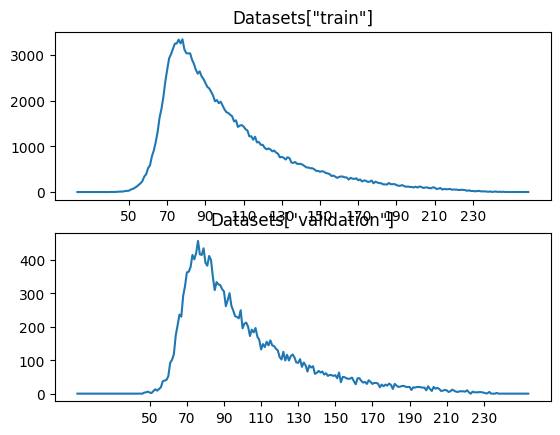

In [22]:
# 문장 길이 확인
from collections import defaultdict
import matplotlib.pyplot as plt

fig = plt.figure()

for fig_idx, split in enumerate(["train", "validation"]):
    title = f"Datasets[\"{split}\"]"
    length_dict = defaultdict(int)
    for idx in range(datasets[split].num_rows):
        review_body_length = len(datasets[split][idx]["review_body"].split())
        length_dict[review_body_length] += 1
    length_dict = dict(sorted(length_dict.items(), key = lambda x: x[0]))
    fig_plot = fig.add_subplot(2, 1, fig_idx + 1)
    fig_plot.set_title(title)
    fig_plot.set_xticks((range(50, 250, 20)))
    fig_plot.plot(length_dict.keys(), length_dict.values())
    

In [23]:
# 70 ~ 90개 단어로 이루어진 리뷰만 사용하기
filtered_datasets = datasets.filter(lambda x: 70 <= len(x["review_body"].split()) <= 90)
filtered_datasets

Filter:   0%|          | 0/160002 [00:00<?, ? examples/s]

Filter:   0%|          | 0/19999 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['review_body', 'review_title'],
        num_rows: 61574
    })
    validation: Dataset({
        features: ['review_body', 'review_title'],
        num_rows: 7921
    })
})

## Tokenize
리뷰와 제목을 토큰화하고 인코딩

모델은 [psyche/KoT5-summarization](https://huggingface.co/psyche/KoT5-summarization) 사용

In [24]:
from transformers import AutoTokenizer

model_checkpoint = "psyche/KoT5-summarization"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

inputs = "30일 기상청에 따르면 태풍 하이쿠이는 오전 3시 기준 괌 북서쪽 약 1140km 부근을 지나고 있으며 중심기압은 980hPa이다."
tokenized_inputs = tokenizer(inputs)
converted_from_ids = tokenizer.convert_ids_to_tokens(tokenized_inputs.input_ids)
print(f">>> Input: {inputs}")
print(f">>> Tokenized: {tokenized_inputs}")
print(f">>> Converted Tokens from input_ids: {converted_from_ids}")

>>> Input: 30일 기상청에 따르면 태풍 하이쿠이는 오전 3시 기준 괌 북서쪽 약 1140km 부근을 지나고 있으며 중심기압은 980hPa이다.
>>> Tokenized: {'input_ids': [528, 25931, 2596, 6106, 873, 3565, 2788, 26436, 437, 965, 63, 25911, 917, 20337, 12344, 26298, 322, 467, 2490, 2283, 5607, 25895, 13520, 1034, 853, 25903, 26444, 25905, 272, 2725, 26358, 26333, 26148, 41, 25892, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
>>> Converted Tokens from input_ids: ['▁30', '일', '▁기상', '청에', '▁따르면', '▁태풍', '▁하이', '쿠', '이는', '▁오전', '▁3', '시', '▁기준', '▁괌', '▁북서', '쪽', '▁약', '▁11', '40', 'km', '▁부근', '을', '▁지나고', '▁있으며', '▁중심', '기', '압', '은', '▁9', '80', 'h', 'P', 'a', '이다', '.', '</s>']


말뭉치를 토큰화하려면 요약 작업과 관련된 특수한 상황을 처리해야 한다. 지나치게 긴 입력은 truncation 작업을 수행한다.

~~&#129303;Transformers의 Tokenizer는 입력과 병렬로 레이블을 토큰화할 수 있는 `as_target_tokenizer()` 함수를 제공한다.(Deprecated in Transformers v5)~~

이것은 일반적으로 먼저 입력을 인코딩한 다음 레이블을 별도의 열로 인코딩하는 전처리 함수 내부의 컨텍스트 관리자를 사용하여 수행된다.

In [26]:
tokenizer

T5TokenizerFast(name_or_path='psyche/KoT5-summarization', vocab_size=32100, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'additional_special_tokens': ['<extra_id_0>', '<extra_id_1>', '<extra_id_2>', '<extra_id_3>', '<extra_id_4>', '<extra_id_5>', '<extra_id_6>', '<extra_id_7>', '<extra_id_8>', '<extra_id_9>', '<extra_id_10>', '<extra_id_11>', '<extra_id_12>', '<extra_id_13>', '<extra_id_14>', '<extra_id_15>', '<extra_id_16>', '<extra_id_17>', '<extra_id_18>', '<extra_id_19>', '<extra_id_20>', '<extra_id_21>', '<extra_id_22>', '<extra_id_23>', '<extra_id_24>', '<extra_id_25>', '<extra_id_26>', '<extra_id_27>', '<extra_id_28>', '<extra_id_29>', '<extra_id_30>', '<extra_id_31>', '<extra_id_32>', '<extra_id_33>', '<extra_id_34>', '<extra_id_35>', '<extra_id_36>', '<extra_id_37>', '<extra_id_38>', '<extra_id_39>', '<extra_id_40>', '<extra_id_41>'

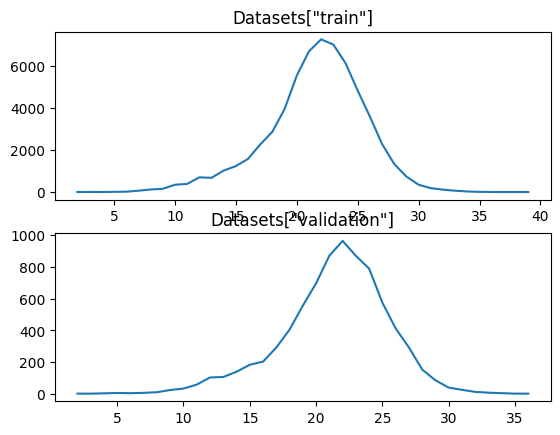

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure()

for plt_idx, split in enumerate(["train", "validation"]):
    title = f"Datasets[\"{split}\"]"
    length_dict = defaultdict(int)
    for idx in range(filtered_datasets[split].num_rows):
        token_length = len(filtered_datasets[split][idx]["review_title"].split())
        length_dict[token_length] += 1
    length_dict = dict(sorted(length_dict.items(), key = lambda x: x[0]))
    
    sub_plot = fig.add_subplot(2, 1, plt_idx + 1)
    sub_plot.set_title(title)
    sub_plot.plot(length_dict.keys(), length_dict.values())

In [31]:
max_input_length = 512
max_target_length = 30


def preprocess_function(examples):
    model_inputs = tokenizer(
			examples["review_body"], max_length = max_input_length, truncation = True
	)
    
    # 타겟을 위한 토크나이저 설정
    labels = tokenizer(
            text_target = examples["review_title"], max_length = max_target_length, truncation = True
    )
    
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs   

In [32]:
tokenized_datasets = filtered_datasets.map(preprocess_function, batched = True, num_proc = 8)
tokenized_datasets

Map (num_proc=8):   0%|          | 0/61574 [00:00<?, ? examples/s]

Map (num_proc=8):   0%|          | 0/7921 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['review_body', 'review_title', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 61574
    })
    validation: Dataset({
        features: ['review_body', 'review_title', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 7921
    })
})

In [35]:
print(tokenized_datasets["train"][0]["input_ids"])
print(tokenized_datasets["train"][0]["labels"])

[5984, 10379, 13386, 32, 49, 459, 1513, 8579, 722, 25938, 23810, 1141, 3649, 3359, 25927, 3570, 25972, 113, 26140, 9383, 23577, 2389, 120, 173, 11, 35, 25892, 1051, 729, 529, 228, 1152, 22473, 14734, 121, 20627, 6867, 3671, 506, 3071, 26149, 26054, 3354, 1682, 1571, 1050, 14447, 1267, 22854, 25952, 7233, 25915, 2682, 5572, 25901, 2583, 7193, 10440, 9469, 20577, 2820, 35, 25892, 1942, 23810, 951, 25905, 16, 1306, 3649, 506, 7628, 7233, 6, 5189, 1943, 1822, 25892, 1942, 21135, 1546, 4748, 4913, 25890, 656, 1364, 25895, 7353, 5, 1764, 22664, 2282, 12615, 2064, 231, 2741, 72, 4226, 25907, 2990, 79, 3601, 12964, 21736, 198, 593, 7628, 343, 9200, 3742, 1460, 895, 25892, 1]
[729, 12594, 5687, 22473, 9469, 49, 459, 19842, 5370, 7628, 7233, 6, 5981, 11, 8385, 7628, 17473, 1841, 6704, 2926, 25892, 1]


## 텍스트 요약을 위한 평가지표
